## Import Libraries

In [1]:
import torch
import torchio as tio
import os
import glob
import random
import nibabel as nib
import numpy as np
import monai
import matplotlib.pyplot as plt
import tqdm

## Filter out problematic images

In [58]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\SWI"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    # if file.split("_")[-1] == "ph.nii.gz":
    #     ph_q = True
    # else:
    #     ph_q = False
    if (number == prev):
        print(number)
        #os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

['06-10664-D0MR']
['09-10683-D0MR']
['09-10890-D0MR']
['16-10232-D0MR']
['21-10049-D0MR']
['21-10049-D0MR']


In [14]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\TOF3D"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\TOF3D"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    if "_".join(file.split("_")[-2:]) == "Eq_1.nii.gz":
        eq1_q = True
    else:
        eq1_q = False
    if (number == prev) & (eq1_q):
        os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

In [42]:
swi_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
mask_dir = "D:\\THROMBMICS-ALARMS_20240531\\MASK"

swi_numbers = [file.split("_")[1:2][0] for file in os.listdir(swi_dir)]
mask_numbers = [file.split("_")[1:2][0] for file in os.listdir(mask_dir)]

diff = set(mask_numbers) - set(swi_numbers)

print(diff)

{'16-10170-D0MR', '02-10871-D0MR', '07-10333-D0MR', '14-10034-D0MR', '21-10163-D0MR', '21-10135-D0MR', '18-10428-D0MR', '01-10221-D0MR', '14-10119-D0MR', '14-10239-D0MR', '06-10750-D0MR', '05-10410-D0MR', '30-10034-D0MR', '18-10183-D0MR', '14-10164-D0MR', '30-10085-D0MR', '06-10487-D0MR', '14-10269-D0MR', '14-10115-D0MR', '18-10542-D0MR', '18-10099-D0MR', '06-10516-D0MR', '09-10890-D0MR', '21-10158-D0MR', '02-10874-D0MR', '30-10091-D0MR', '16-10168-D0MR', '30-10092-D0MR', '30-10090-D0MR', '06-10778-D0MR', '14-10156-D0MR', '02-10555-D0MR', '17-10120-D0MR', '16-10025-D0MR', '14-10172-D0MR', '02-10878-D0MR', '14-10068-D0MR', '06-10769-D0MR', '02-10722-D0MR', '14-10153-D0MR', '14-10238-D0MR', '30-10082-D0MR', '30-10083-D0MR', '07-10335-D0MR', '14-10120-D0MR', '30-10076-D0MR', '18-10396-D0MR', '14-10123-D0MR', '18-10206-D0MR', '14-10173-D0MR', '14-10087-D0MR', '21-10049-D0MR', '30-10088-D0MR', '14-10166-D0MR', '04-10442-D0MR', '14-10125-D0MR', '30-10094-D0MR', '14-10243-D0MR', '09-10674-D0M

In [57]:
source_dir = "E:\\Data_ETIS\\THROMBMICS-ALARMS_20240531"
target_dir = "E:\\Data_ETIS\\Temp"

for number in list(diff):
    for directory in glob.glob(os.path.join(source_dir, "2018-104_"+ number, "T2star_*")):
        for nii_file in os.listdir(directory):
            os.rename(os.path.join(directory, nii_file), os.path.join(target_dir, nii_file))
            print("Processed "+ nii_file)

Processed 2018-104_16-10170-D0MR_22_AX_T2_EG.nii.gz
Processed 2018-104_02-10871-D0MR_6_Ax_T2_GRE.nii.gz
Processed 2018-104_07-10333-D0MR_20_SWI_Images.nii.gz
Processed 2018-104_14-10034-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_21-10163-D0MR_401_cs_T2_FFE.nii.gz
Processed 2018-104_21-10135-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_18-10428-D0MR_11_T2_EG_AX.nii.gz
Processed 2018-104_01-10221-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_14-10119-D0MR_16_T2_EG_AX.nii.gz
Processed 2018-104_14-10239-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_06-10750-D0MR_8_AX_T2_EG_STD.nii.gz
Processed 2018-104_05-10410-D0MR_12_t2_fl2d_tra_4mm_hemo_te_25.nii.gz
Processed 2018-104_30-10034-D0MR_8_t2_fl2d_ax.nii.gz
Processed 2018-104_18-10183-D0MR_12_T2_EG_AX.nii.gz
Processed 2018-104_14-10164-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_30-10085-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_06-10487-D0MR_9_AX_T2_EG_STD.nii.gz
Processed 2018-104_14-10269-D0MR_16_AX_T2_.nii.gz
Processed 2018-104_14-101

## Separate Test Batch of Images

In [26]:
thrombus_mask_train_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
thrombus_mask_test_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
thrombus_mask_val_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
foreground_mask_train_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Foreground_Train"
foreground_mask_test_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"
foreground_mask_val_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
swi_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
swi_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
swi_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
tof_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\TOF3D_Train"
tof_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\TOF3D_Test"
tof_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\TOF3D_Val"

In [27]:
def separate_image_batch(thrombus_mask_source, thrombus_mask_destination, foreground_mask_source, foreground_mask_destination, swi_source, swi_destination, tof_source, tof_destination, batch_size, seed_value=777):
    # Separate four source folders, thrombus mask(labels) , brain foreground masks with thrombus, swi images, tof images into four other destination folders (e.g. validation or test),
    # sending the specified number of images selected randomly.
    random.seed(seed_value)
    batch_indexes = random.sample(range(len(os.listdir(thrombus_mask_source))), batch_size)

    thrombus_mask_file_list = [os.listdir(thrombus_mask_source)[index] for index in batch_indexes]
    for file in thrombus_mask_file_list:
        os.rename(os.path.join(thrombus_mask_source, file), os.path.join(thrombus_mask_destination, file))

    foreground_mask_file_list = [os.listdir(foreground_mask_source)[index] for index in batch_indexes]
    for file in foreground_mask_file_list:
        os.rename(os.path.join(foreground_mask_source, file), os.path.join(foreground_mask_destination, file))
    
    swi_file_list = [os.listdir(swi_source)[index] for index in batch_indexes]
    for file in swi_file_list:
        os.rename(os.path.join(swi_source, file), os.path.join(swi_destination, file))

    tof_file_list = [os.listdir(tof_source)[index] for index in batch_indexes]
    for file in tof_file_list:
        os.rename(os.path.join(tof_source, file), os.path.join(tof_destination, file))

Separate test.

In [28]:
separate_image_batch(thrombus_mask_train_dir, thrombus_mask_test_dir, foreground_mask_train_dir, foreground_mask_test_dir, swi_train_dir, swi_test_dir, tof_train_dir, tof_test_dir, 100, seed_value=777)

Separate validation.

In [29]:
separate_image_batch(thrombus_mask_train_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_val_dir, swi_train_dir, swi_val_dir, tof_train_dir, tof_val_dir, 181, seed_value=777)

Clear out the training folders.

In [4]:
def clean_training_folders(thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir):
    # Remove files from training, validation and test folders of labels, foreground masks, swi images and tof images.
    folder_list = [thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir]
    for folders in folder_list:
        for file in os.listdir(folders):
            os.remove(os.path.join(folders, file))

In [5]:
clean_training_folders(thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir)

Fill training folders from processed images folder

In [8]:
def fill_training_folders(source_dir, thrombus_mask_train_dir, swi_train_dir, tof_train_dir):
    # Send images from a source folder containing MASK, SWI and TOF3D folders to the training folders.
    for folders in os.listdir(source_dir):
        if (folders.split("_")[0] == "MASK") | (folders == "MASK"):
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(thrombus_mask_train_dir,files))
        elif folders.split("_")[0] == "SWI":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(swi_train_dir,files))
        elif folders.split("_")[0] == "TOF3D":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(tof_train_dir,files))

In [13]:
source_dir = "D:\\data_ETIS_781\\Resized"

fill_training_folders(source_dir, thrombus_mask_train_dir, swi_train_dir, tof_train_dir)

## Helper Functions

In [2]:
def save_array_to_nifti1(array, original_img, destination_path, output_name):
    # Transform the array to a nifti image which requires the affine of the original image.
    if isinstance(original_img, nib.Nifti1Image) :
        processed_img = nib.Nifti1Image(array, original_img.affine)
    else:
        processed_img = nib.Nifti1Image(array, nib.load(original_img).affine)
    
    nib.save(processed_img, os.path.join(destination_path, output_name))

def remove_padding_from_tensor(tensor, original_dims):
    # Apply the padding removal function to the tensor to restore the original dimensions
    current_dims = tensor.shape[-len(original_dims):]
    resized_tensor = tensor
    
    for dim, (original_size, current_size) in enumerate(zip(original_dims, current_dims), start=-len(original_dims)):
        total_padding = current_size - original_size
        padding_before = total_padding // 2
        
        resized_tensor = torch.narrow(resized_tensor, dim, padding_before, original_size)
    return resized_tensor

def logit_to_binary_mask(tensor, threshold=0.5):
    # Transform a tensor of logits into a binary mask according to the specified probability threshold.
    mask_tensor = torch.sigmoid(tensor)

    return (mask_tensor >= threshold).float()

def restore_inference_original_size (prediction_list, original_img_dir):
    return [torch.squeeze(
        remove_padding_from_tensor(prediction, nib.load(os.path.join(original_img_dir, original_file)).shape)
        )
        for prediction, original_file in zip(prediction_list, os.listdir(original_img_dir))
        ]

def load_prediction_masks (mask_dir):
    return [torch.tensor(nib.load(os.path.join(mask_dir, mask)).get_fdata()) for mask in os.listdir(mask_dir) if (mask.endswith(".nii.gz"))]

def save_checkpoint(model, optimizer, epoch, loss, filepath):
    # Saves a checkpoint of a PyTorch model.
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, filepath)

## 3D Segmentation Training

### Use the SubjectsDataset class from torchio

In [9]:
class HighToleranceSubject(tio.Subject):
    # A custom instance of Subject with higher tolerance in attribute checking.
    def check_consistent_attribute(self, *args, **kwargs) -> None:
        kwargs['relative_tolerance'] = 1e-4
        kwargs['absolute_tolerance'] = 1e-4
        return super().check_consistent_attribute(*args, **kwargs)

def load_subjectsdataset_1channel (swi_dir, thrombus_labels_dir, foreground_labels_dir, **kwargs):
    subjects_list = []
    swi_list = os.listdir(swi_dir)
    thrombus_labels_list = os.listdir(thrombus_labels_dir)
    foreground_labels_list = os.listdir(foreground_labels_dir)
    
    if len(swi_list) != len(thrombus_labels_list) != len(foreground_labels_list):
        print("Mismatch in sample numbers")
    
    for swi_file, thrombus_label_file, foreground_label_file in zip(swi_list, thrombus_labels_list, foreground_labels_list):
        subject = HighToleranceSubject(
            swi_image=tio.ScalarImage(os.path.join(swi_dir, swi_file)),
            thrombus_label = tio.LabelMap(os.path.join(thrombus_labels_dir, thrombus_label_file)),
            foreground_label = tio.LabelMap(os.path.join(foreground_labels_dir, foreground_label_file)),
            subject_number = "_".join(swi_file.split("_")[:2])
        )
        subjects_list.append(subject)
    
    return tio.SubjectsDataset(subjects_list, **kwargs)

def load_subjectsdataset_2channel (swi_dir, tof_dir, thrombus_labels_dir, foreground_labels_dir, **kwargs):
    subjects_list = []
    swi_list = os.listdir(swi_dir)
    tof_list = os.listdir(tof_dir)
    thrombus_labels_list = os.listdir(thrombus_labels_dir)
    foreground_labels_list = os.listdir(foreground_labels_dir)
    
    if len(swi_list) != len(tof_list) != len(thrombus_labels_list) != len(foreground_labels_list):
        print("Mismatch in sample numbers")
    
    for swi_file, tof_file, thrombus_label_file, foreground_label_file in zip(swi_list, tof_list, thrombus_labels_list, foreground_labels_list):
        subject = HighToleranceSubject(
            swi_image=tio.ScalarImage(os.path.join(swi_dir, swi_file)),
            tof_image=tio.ScalarImage(os.path.join(tof_dir, tof_file)),
            thrombus_label = tio.LabelMap(os.path.join(thrombus_labels_dir, thrombus_label_file)),
            foreground_label = tio.LabelMap(os.path.join(foreground_labels_dir, foreground_label_file)),
            subject_number = "_".join(swi_file.split("_")[:2])
        )
        subjects_list.append(subject)
    
    return tio.SubjectsDataset(subjects_list, **kwargs)



In [4]:
swi_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
tof_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\TOF3D_Train"
thrombus_labels_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
foreground_labels_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Foreground_Train"

In [5]:
train_dataset = load_subjectsdataset_1channel(swi_dir, thrombus_labels_dir, foreground_labels_dir)

### Setup Sampler

In [6]:
train_sampler = tio.data.LabelSampler(patch_size=(145,145,18), label_name="foreground_label", label_probabilities={0: 0, 1: 0.8, 2: 0.2})

In [7]:
queue_length = 7000
samples_per_volume = 25

train_patches_queue = tio.Queue(train_dataset, queue_length, samples_per_volume, train_sampler, num_workers=0)

train_patches_loader = torch.utils.data.DataLoader(train_patches_queue, batch_size=6, num_workers=0)

In [50]:
tio.Queue.get_max_memory_pretty(train_patches_queue)

'29.6 GiB'

### Training Loop

In [8]:
model = monai.networks.nets.BasicUNetPlusPlus(spatial_dims=3, in_channels=1, out_channels=1, features=(32,32,64,128,256,32))

BasicUNetPlusPlus features: (32, 32, 64, 128, 256, 32).


In [9]:
focal_loss = monai.losses.FocalLoss(gamma=5, alpha=0.75)

In [10]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
def train_model (model, loss, optimizer, num_epochs=10, save_checkpoint_flag=False, checkpoint_location=None):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        train_loss_value = 0
        for patches_batch in tqdm.tqdm(train_patches_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            images = patches_batch["swi_image"][tio.DATA]
            gt_masks = patches_batch["thrombus_label"][tio.DATA]
            images, gt_masks = images.to(device), gt_masks.to(device)
            
            optimizer.zero_grad()
            predicted_mask = model(images)[0]
            train_loss = loss(predicted_mask, gt_masks)
            train_loss.backward()
            optimizer.step()
            train_loss_value += train_loss.item()
        
        train_loss_value /= len(train_patches_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss_value:.8f}")
        
        model.eval()
        val_loss_value = 0
        with torch.no_grad():
            for patches_batch in tqdm.tqdm(train_patches_loader, desc=f"Validating Epoch {epoch+1}/{num_epochs}"):
                images = patches_batch["swi_image"][tio.DATA]
                gt_masks = patches_batch["thrombus_label"][tio.DATA]
                images, gt_masks = images.to(device), gt_masks.to(device)
                
                predicted_mask = model(images)[0]
                val_loss = loss(predicted_mask, gt_masks)
                val_loss_value += val_loss.item()

        val_loss_value /= len(train_patches_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss_value:.8f}")
        
        if save_checkpoint_flag:
            save_checkpoint(model, optimizer, epoch, loss, checkpoint_location)

In [16]:
train_model(model, focal_loss, optimizer, save_checkpoint_flag=True, checkpoint_location="D:\\data_ETIS_781\\Training\\Checkpoints\\model\\train_500x25_gamma5_checkpoint.pth")

Training Epoch 1/10: 100%|██████████| 2084/2084 [1:49:32<00:00,  3.15s/it]   


Epoch 1/10, Training Loss: 0.00010889


Validating Epoch 1/10: 100%|██████████| 2084/2084 [28:55<00:00,  1.20it/s]   


Epoch 1/10, Validation Loss: 0.00004025


Training Epoch 2/10: 100%|██████████| 2084/2084 [1:49:52<00:00,  3.16s/it]   


Epoch 2/10, Training Loss: 0.00003707


Validating Epoch 2/10: 100%|██████████| 2084/2084 [29:37<00:00,  1.17it/s]   


Epoch 2/10, Validation Loss: 0.00003159


Training Epoch 3/10: 100%|██████████| 2084/2084 [9:43:36<00:00, 16.80s/it]     


Epoch 3/10, Training Loss: 0.00003405


Validating Epoch 3/10: 100%|██████████| 2084/2084 [29:30<00:00,  1.18it/s]   


Epoch 3/10, Validation Loss: 0.00003056


Training Epoch 4/10: 100%|██████████| 2084/2084 [22:55:04<00:00, 39.59s/it]       


Epoch 4/10, Training Loss: 0.00002506


Validating Epoch 4/10: 100%|██████████| 2084/2084 [29:31<00:00,  1.18it/s]   


Epoch 4/10, Validation Loss: 0.00002470


Training Epoch 5/10: 100%|██████████| 2084/2084 [1:49:48<00:00,  3.16s/it]   


Epoch 5/10, Training Loss: 0.00002682


Validating Epoch 5/10: 100%|██████████| 2084/2084 [29:29<00:00,  1.18it/s]   


Epoch 5/10, Validation Loss: 0.00002307


Training Epoch 6/10: 100%|██████████| 2084/2084 [21:30:08<00:00, 37.14s/it]        


Epoch 6/10, Training Loss: 0.00002240


Validating Epoch 6/10: 100%|██████████| 2084/2084 [29:32<00:00,  1.18it/s]   


Epoch 6/10, Validation Loss: 0.00002172


Training Epoch 7/10: 100%|██████████| 2084/2084 [1:50:57<00:00,  3.19s/it]   


Epoch 7/10, Training Loss: 0.00002080


Validating Epoch 7/10: 100%|██████████| 2084/2084 [28:48<00:00,  1.21it/s]   


Epoch 7/10, Validation Loss: 0.00002050


Training Epoch 8/10: 100%|██████████| 2084/2084 [1:49:48<00:00,  3.16s/it]   


Epoch 8/10, Training Loss: 0.00001885


Validating Epoch 8/10: 100%|██████████| 2084/2084 [30:52<00:00,  1.13it/s]   


Epoch 8/10, Validation Loss: 0.00001692


Training Epoch 9/10:  56%|█████▌    | 1167/2084 [1:07:47<53:16,  3.49s/it]   


KeyboardInterrupt: 

## Load model and predict

### Predict from patches

In [3]:
model_for_prediction = monai.networks.nets.BasicUNetPlusPlus(spatial_dims=3, in_channels=1, out_channels=1, features=(32,32,64,128,256,32))

BasicUNetPlusPlus features: (32, 32, 64, 128, 256, 32).


In [4]:
learning_rate = 0.01
optimizer_for_prediction = torch.optim.Adam(model_for_prediction.parameters(), lr=learning_rate)

In [5]:
model_for_prediction_checkpoint = torch.load("D:\\data_ETIS_781\\Training\\Checkpoints\\model\\train_500x25_gamma5_checkpoint.pth")

In [6]:
model_for_prediction.load_state_dict(model_for_prediction_checkpoint["model_state_dict"])
optimizer_for_prediction.load_state_dict(model_for_prediction_checkpoint['optimizer_state_dict'])

In [7]:
train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
train_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
train_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\MASK_Foreground_Train"
val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
val_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
val_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
test_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
test_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"

In [10]:
#train_dataset = load_subjectsdataset_1channel (train_dir, train_label_dir, train_foreground_label_dir)
#val_dataset = load_subjectsdataset_1channel (val_dir, val_label_dir, val_foreground_label_dir)
test_dataset = load_subjectsdataset_1channel (test_dir, test_label_dir, test_foreground_label_dir)

In [11]:
def pad_collate_fn(batch):
    # Collate function to ensure batches have the same size, that is the size of the largest image in the batch.
    # Find the max shape in each dimension from the batch
    max_dims = [max([subject['swi_image'][tio.DATA].shape[-3:][d] for subject in batch]) for d in range(3)]
    
    # Apply padding to each image in the batch to match the largest dimensions
    padded_subjects = []
    for subject in batch:
        subject_image = subject['swi_image'][tio.DATA]  # Get the image tensor
        
        # Calculate how much padding is needed for each dimension
        padding = []
        for max_dim, current_size in zip(max_dims, subject_image.shape[-3:]):
            total_padding = max_dim - current_size
            # Divide padding evenly across both sides
            padding_before = total_padding // 2
            padding_after = total_padding - padding_before  # Handle the case where the difference is odd
            padding.extend([padding_before, padding_after])
                
        # Apply padding to the image
        pad_transform = tio.Pad(padding)
        padded_image = pad_transform(subject['swi_image'])
        
        # Create a new Subject with the padded image
        padded_subject = tio.Subject(swi_image=tio.ScalarImage(tensor=padded_image[tio.DATA]))
        padded_subjects.append(padded_subject)
    
    return padded_subjects

In [12]:
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=6, collate_fn=pad_collate_fn, shuffle=False, num_workers=0)

In [13]:
def run_inference (inference_dataloader, model_for_prediction, patch_size, patch_overlap, inference_dir_location, return_logits=True, patch_loader_batchsize=10, logit_threshold=0.5):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model_for_prediction = model_for_prediction.to(device)

    whole_image_predictions = []

    for batch in inference_dataloader:
        for subject in batch:
            grid_sampler = tio.inference.GridSampler(subject, patch_size, patch_overlap)
            patch_loader = tio.SubjectsLoader(grid_sampler, batch_size=patch_loader_batchsize)
            aggregator = tio.inference.GridAggregator(grid_sampler)
            
            with torch.no_grad(): 
                for patches_batch in tqdm.tqdm(patch_loader, desc="Running Inference"):
                    input_tensor = patches_batch["swi_image"][tio.DATA].to(device)
                    locations = patches_batch[tio.LOCATION]
                    logits = model_for_prediction(input_tensor)[0]
                    logits = logits.cpu()
                    if return_logits == False:
                        labels = logit_to_binary_mask(logits, threshold=logit_threshold)
                        aggregator.add_batch(labels, locations)
                    else:
                        aggregator.add_batch(logits, locations)
            whole_prediction = aggregator.get_output_tensor().cpu()
            whole_image_predictions.append(whole_prediction)
    return restore_inference_original_size(whole_image_predictions, inference_dir_location)

In [18]:
def save_predictions (predictions_list, save_destination, filename_source_dir):
    if not os.path.exists(save_destination):
        os.makedirs(save_destination)
        print(f"Folder created at {save_destination}")
    else:
        if os.listdir(save_destination):
            print(f"Error: Save location at {save_destination} is not empty.")
            sys.exit(1)
            
    for mask, filename in zip(predictions_list, os.listdir(filename_source_dir)):
        output_mask_name = "_".join(filename.split("_")[:2]) + "_Prediction" + ".nii.gz"
        save_array_to_nifti1(np.array(mask), os.path.join(filename_source_dir, filename), save_destination, output_mask_name)

In [37]:
def compute_dice_metric (prediction_list, ground_truth_masks_list):
    dice_metric = monai.metrics.DiceMetric(include_background=True, reduction="mean", get_not_nans=False)
    dice_score_list = np.array(
        [dice_metric(prediction.unsqueeze(0).unsqueeze(0), gt_mask.unsqueeze(0).unsqueeze(0))
         for prediction, gt_mask in zip(prediction_list, ground_truth_masks_list)]
        ).flatten()
    print(f"Mean Dice Score is {dice_score_list.mean()}")
    return dice_score_list

def compute_sensitivity_metric (prediction_list, ground_truth_masks_list):
    intersection_list = np.array(
        [((prediction * gt_mask).sum()/gt_mask.sum()) for prediction, gt_mask in zip(prediction_list, ground_truth_masks_list)]
    ).flatten()
    print(f"Mean Sensitivity is {intersection_list.mean()}")
    return intersection_list

In [ ]:
prediction_dir_location = "D:\\data_ETIS_781\\Training\\Predictions\\Test_Predictions\\SWI_Predictions\\Predictions_patients500_gamma5_sigmoid05"
ground_truth_label_location = test_label_dir

logits_list = run_inference(test_dataloader, model_for_prediction, (145,145,18), (4, 4, 4), test_dir, return_logits=True)
predictions_list = [logit_to_binary_mask(logits, threshold=0.5) for logits in logits_list]
save_predictions(predictions_list, prediction_dir_location, ground_truth_label_location)
ground_truth_masks_list = load_prediction_masks(ground_truth_label_location)
dice_score_list = compute_dice_metric(predictions_list, ground_truth_masks_list)
intersection_list = compute_sensitivity_metric(predictions_list, ground_truth_masks_list)

In [63]:
prediction_dir_location = "D:\\data_ETIS_781\\Training\\Predictions\\Test_Predictions\\SWI_Predictions\\Predictions_patients500_gamma5_sigmoid05"
ground_truth_label_location = test_label_dir

predictions_list = [logit_to_binary_mask(logits, threshold=0.5) for logits in logits_list]
ground_truth_masks_list = load_prediction_masks(ground_truth_label_location)
dice_score_list = compute_dice_metric(predictions_list, ground_truth_masks_list)
intersection_list = compute_sensitivity_metric(predictions_list, ground_truth_masks_list)

Mean Dice Score is 0.33588165044784546
Mean Sensitivity is 0.4760641098754138


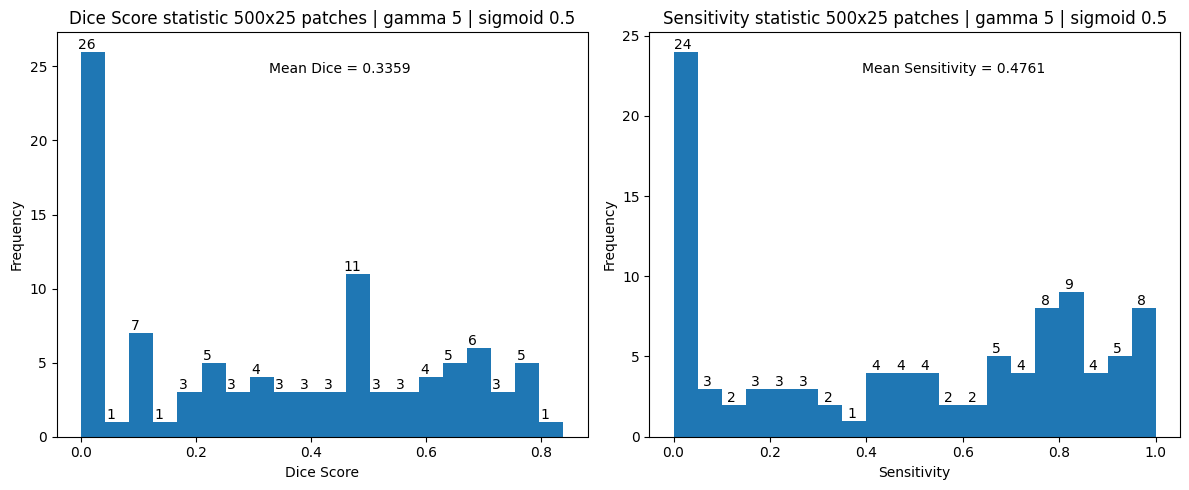

In [64]:
fig, axs = plt.subplots(1,2, figsize=(12, 5))

counts_dice, bins_dice, patches_dice = axs[0].hist(np.array(dice_score_list).flatten(), bins=20)

for count, x in zip(counts_dice, bins_dice[:-1]):
    axs[0].text(x + 0.01, count, str(int(count)), ha="center", va="bottom")

counts_inter, bins_inter, patches_inter = axs[1].hist(np.array(intersection_list).flatten(), bins=20)

for count, x in zip(counts_inter, bins_inter[:-1]):
    axs[1].text(x + 0.02, count, str(int(count)), ha="center", va="bottom")

axs[0].text(0.4, 0.9, f"Mean Dice = {dice_score_list.mean():.4f}", transform=axs[0].transAxes)
axs[0].set_xlabel("Dice Score")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Dice Score statistic 500x25 patches | gamma 5 | sigmoid 0.5")

axs[1].text(0.4, 0.9, f"Mean Sensitivity = {intersection_list.mean():.4f}", transform=axs[1].transAxes)
axs[1].set_xlabel("Sensitivity")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Sensitivity statistic 500x25 patches | gamma 5 | sigmoid 0.5")

plt.tight_layout()
plt.savefig("D:\\data_ETIS_781\\Training\\Checkpoints\\Metrics_Results\\MetricsStatistic_500x25patches_gamma5_sigmoid05.png")

### Predict from whole images

In [35]:
model.eval()

all_predictions_mean = []
all_predictions_first = []

with torch.no_grad():
    for images, test_labels in test_dataloader:
        images = images.to(device)
        predicted_mask_test = model_for_prediction(images)

        predicted_mask_test_mean = predicted_mask_test.mean(dim=1)
        predicted_mask_test_first = predicted_mask_test[:,0,:,:]

        all_predictions_mean.append(predicted_mask_test_mean.cpu())
        all_predictions_first.append(predicted_mask_test_first.cpu())
        
        

RuntimeError: stack expects each tensor to be equal size, but got [1, 512, 512, 24] at entry 0 and [1, 512, 512, 115] at entry 1

## Testing ground